# Code For Probing UPP Output

General purpose code for creating various plots using UPP output

shawn.s.murdzek@noaa.gov  
Date Created: 17 March 2023

In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import plot_model_data as pmd

### Common Cells

All these cells likely need to be run, no matter the specific application

In [30]:
# Load data. Keep this as a separate cell b/c it can take some time to open up the GRIB2 files

upp_files = ['/scratch1/BMC/wrfruc/murdzek/nature_run_spring/wrfnat_202205041915.grib2']

upp_ds = []
for f in upp_files:
    upp_ds.append(xr.open_dataset(f, engine='pynio'))
    
# Variables with suffix '2' are only used for difference plots
upp_files2 = ['/scratch1/BMC/wrfruc/murdzek/nature_run_spring/wrfnat_202205041930.grib2']

upp_ds2 = []
for f in upp_files2:
    upp_ds2.append(xr.open_dataset(f, engine='pynio'))

In [31]:
# Output figure file names
save_fnames = ['test.png']

# Names associated with each of the UPP files
upp_names = ['']

# For difference plots
upp_names2 = ['']

# Domain plotting limits (set lon = [None] to use default limits)
lon = [-75.4, -73.6]
lat = [39.5, 41]

# Single points to plot
lon_pts = [-73.8740, -73.7781, -74.1745]
lat_pts = [40.7769, 40.6413, 40.6895]

### Specialty Cells

Each cell creates a different type of plot. Only one needs to be run.

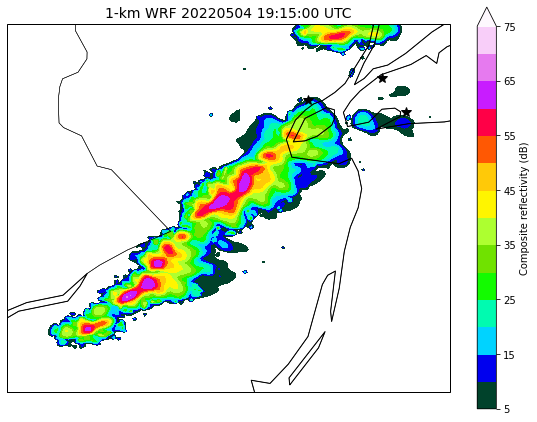

In [24]:
# One horizontal cross section per figure

# Field names to plot
cntf_field = 'REFC_P0_L200_GLC0'  # contourf
pcm_field = None  # pcolormesh
cnt_field = None  # contour
barb_fields = [None]  # barbs
qv_fields = [None]  # quiver

# Keyword arguments
kw_dict = {'cntf':{'ingest':{}, 'kw':{'cmap':'gist_ncar', 'extend':'max', 'levels':np.arange(5, 76, 5)}},
           'pcm':{'ingest':{}, 'kw':{}},
           'cnt':{'ingest':{}, 'kw':{}},
           'barb':{'ingest':{}, 'kw':{}, 'thin':1},
           'qv':{'ingest':{}, 'kw':{}, 'thin':1}}

for ds, name, save in zip(upp_ds, upp_names, save_fnames):
    fig = plt.figure(figsize=(8, 6))
    
    out = pmd.PlotOutput([ds], 'upp', fig, 1, 1, 1)
    if cntf_field != None:
        out.contourf(cntf_field, ingest_kw=kw_dict['cntf']['ingest'], cntf_kw=kw_dict['cntf']['kw'])
    if pcm_field != None:
        out.pcolormesh(pcm_field, ingest_kw=kw_dict['pcm']['ingest'], pcm_kw=kw_dict['pcm']['kw'])
    if cnt_field != None:
        out.contour(cnt_field, ingest_kw=kw_dict['cnt']['ingest'], cnt_kw=kw_dict['cnt']['kw'])
    if barb_fields[0] != None:
        out.barbs(barb_fields[0], barb_fields[1], ingest_kw=kw_dict['barb']['ingest'], 
                  barb_kw=kw_dict['barb']['kw'], thin=kw_dict['barb']['thin'])
    if qv_fields[0] != None:
        out.quiver(qv_fields[0], qv_fields[1], ingest_kw=kw_dict['qv']['ingest'], 
                   qv_kw=kw_dict['qv']['kw'], thin=kw_dict['qv']['thin'])
    for x, y in zip(lon_pts, lat_pts):
        out.plot(x, y, plt_kw={'markersize':10, 'marker':'*', 'color':'k'})
    
    if lon[0] != None:
        out.set_lim(lat[0], lat[1], lon[0], lon[1])
    out.config_ax(grid=False)
    out.ax_title(txt=name, size=14)

    plt.subplots_adjust(left=0.02, bottom=0.04, right=0.98, top=0.97)
    plt.savefig(save)
    plt.show()

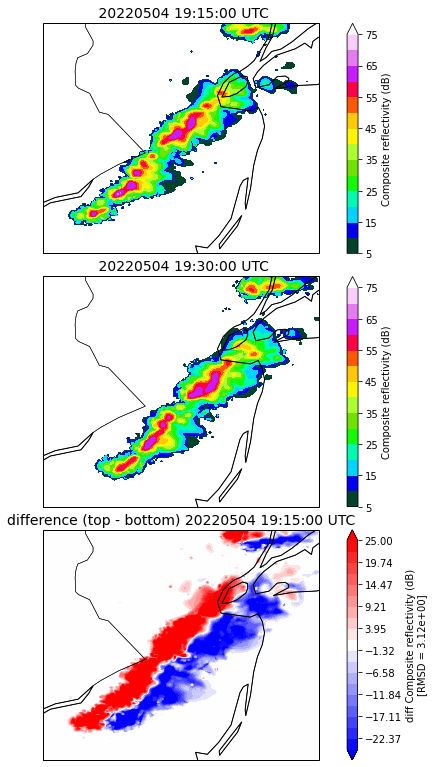

In [35]:
# Difference between two UPP files. Both files must be on the same grid

field = 'REFC_P0_L200_GLC0'
zind = np.nan

# Parameters for regular plots
reg_kw = {'ingest':{'zind':zind}, 'cntf_kw':{'cmap':'gist_ncar', 'extend':'max', 'levels':np.arange(5, 76, 5)}}

# Parameters for difference plots
diff_kw = {'ingest':{'zind':zind}, 'cntf_kw':{'cmap':'bwr', 'extend':'both', 'levels':np.linspace(-25, 25, 20)}}

for ds1, ds2, name1, name2, save in zip(upp_ds, upp_ds2, upp_names, upp_names2, save_fnames):
    fig = plt.figure(figsize=(8, 11))
    for j, (ds, n) in enumerate(zip([ds1, ds2], [name1, name2])):
        out = pmd.PlotOutput([ds], 'upp', fig, 3, 1, j+1)
        out.contourf(field, cntf_kw=reg_kw['cntf_kw'], ingest_kw=reg_kw['ingest'])
        out.config_ax(grid=False)
        out.ax_title(txt=n, size=14)
        if lon[0] != None:
            out.set_lim(lat[0], lat[1], lon[0], lon[1])

    diff = pmd.PlotOutput([ds1, ds2], 'upp', fig, 3, 1, 3)
    diff.plot_diff(field, auto=False, cntf_kw=diff_kw['cntf_kw'], ingest_kw=diff_kw['ingest'])
    diff.config_ax(grid=False)
    diff.ax_title(txt='difference (top - bottom)', size=14)
    if lon[0] != None:
        diff.set_lim(lat[0], lat[1], lon[0], lon[1])

    plt.subplots_adjust(left=0.02, bottom=0.04, right=0.98, top=0.97, hspace=0.1)
    plt.savefig(save)
    plt.show()

### Common Plotting Parameters

Place to save keyword arguments and UPP field names that I use often

In [10]:
# Single horizontal cross sections

# Composite reflectivity filled contour plot
cntf_field = 'REFC_P0_L200_GLC0'
kw_dict = {'cntf':{'ingest':{}, 'kw':{'cmap':'gist_ncar', 'extend':'max', 'levels':np.arange(5, 76, 5)}}}

# 10-m wind barbs
barb_fields = ['UGRD_P0_L103_GLC0', 'VGRD_P0_L103_GLC0']
kw_dict = {'barb':{'ingest':{'zind':0}, 'kw':{}, 'thin':10}}

# Land-sea mask
pcm_field = 'LAND_P0_L1_GLC0'
kw_dict = {'pcm':{'ingest':{}, 'kw':{'cmap':'winter', 'vmin':0, 'vmax':1}}}

# Terrain (model surface height ASL)
pcm_field = 'HGT_P0_L1_GLC0'
kw_dict = {'pcm':{'ingest':{}, 'kw':{'cmap':'plasma', 'vmin':0, 'vmax':600}}}